In [ ]:
import numpy as np
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from copy import copy
import tensorflow as tf
from gpflow.utilities import read_values
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotting_utils import load_hyperparameters
# mpl.style.use('mystyle.mplstyle')
import gpflow
from models.utils import mo_indi_init, lmc_init, avg_init, lvmogp_init, get_gridpoints
from plotting_utils import fit_model_from_hyperparameters, plot_all_models_from_hyperparameters, plot_log_marginal_likelihoods_of_restarts
from gpflow.utilities import print_summary
from gpflow.base import default_float
full_width = 7.5
halfwidth = 3.5


2023-05-31 15:43:18.782668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Notebook for Plotting Predictions from Saved Hyperparameters and the Log Marginal Likelihoods of each Initialisation

Plot the predictions of each of the models for a given certain surface type, seed and number of points

In [ ]:
surface_type = 'linear_relation'
test_type = 'two_observed_10_new'
n_new_points = 8
seed = 3
dataseed = 3


path = pl.Path.home()/ \
       f'Transfer_Learning_GP_Results/hyperparameters/hyperparameters_{surface_type}_{test_type}_{n_new_points}_points_seed_{seed}_dataseed_{dataseed}.pkl'

hyperparams = load_hyperparameters(path)

In [ ]:
hyperparams['final_lml'] = [hyperparams['lmls'].to_numpy()[i][-1] for i in range(len(hyperparams))]

Create each model from the saved hyperparameter

In [ ]:


gps = {model_name: None for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']}
for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']:
       print(model_name)
       mod_df = hyperparams[hyperparams['model'] == model_name]
       gps[model_name] = fit_model_from_hyperparameters(mod_df)

Make predictions and plot each model

In [ ]:
plot_all_models_from_hyperparameters(gps, hyperparams, plot_new_ys=False, save_fig=False, save_path=None)

For the log marginal likelihoods, first load all the hyperparameter pickles, then make plots

In [38]:
from analysis_utils import load_all_hyperparameters

hyp_df = load_all_hyperparameters()
hyp_df['final_lml'] = [hyp_df['lmls'].to_list()[i][-1] for i in range(len(hyp_df))]

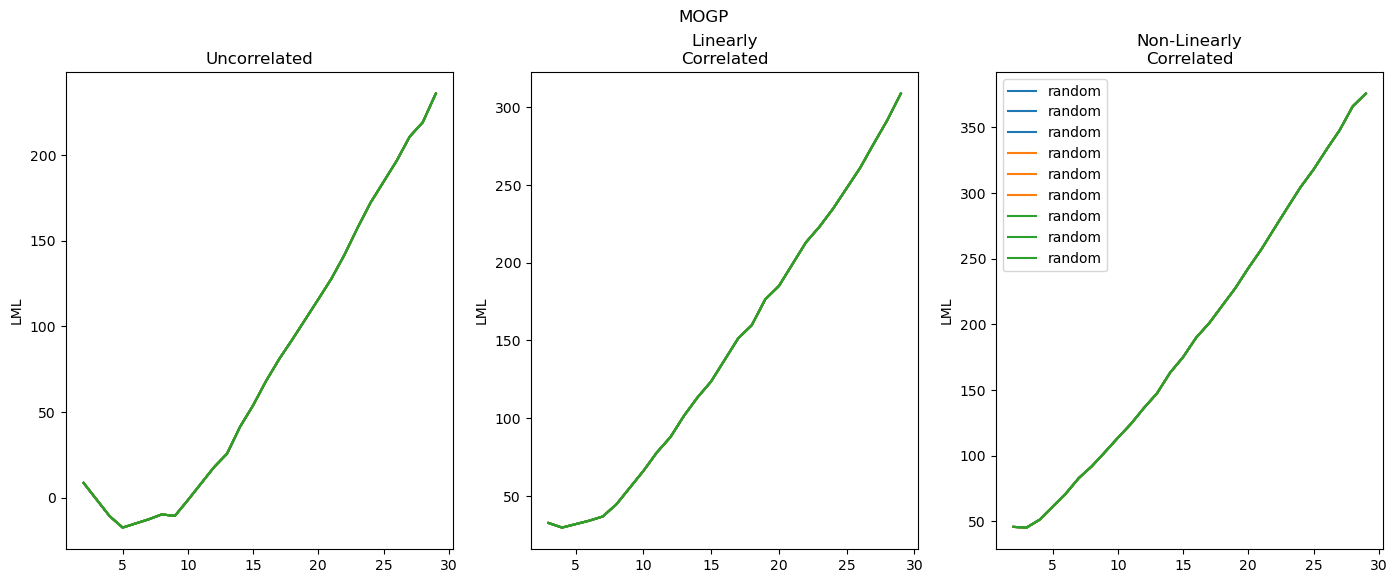

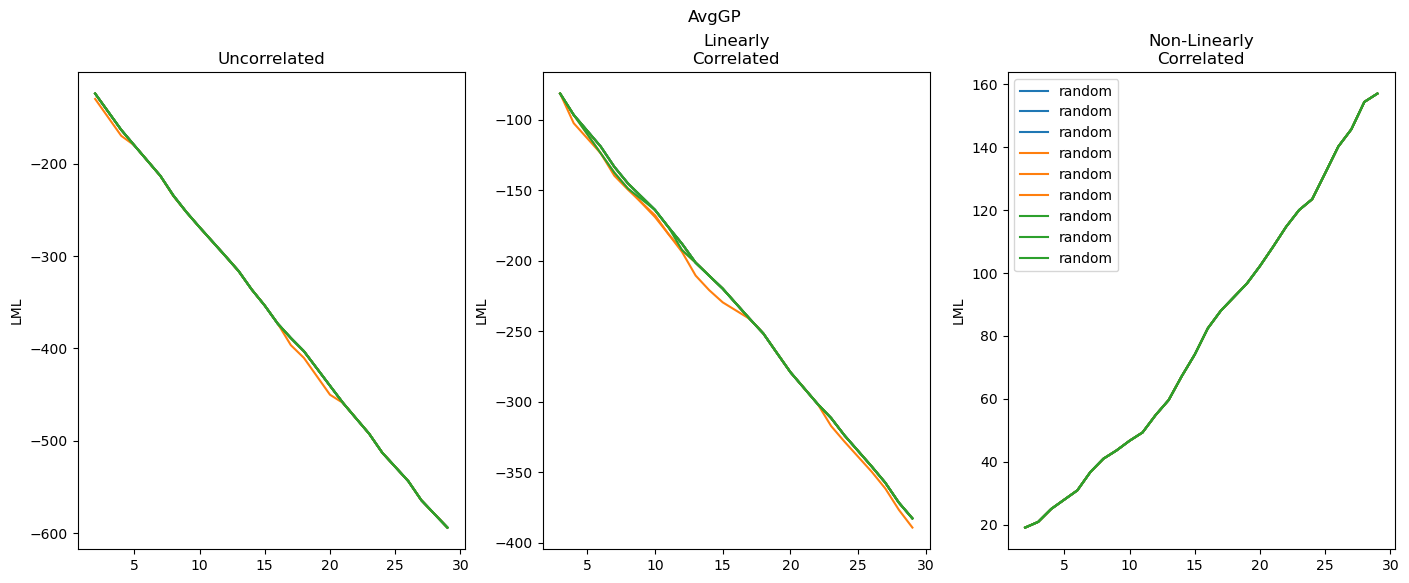

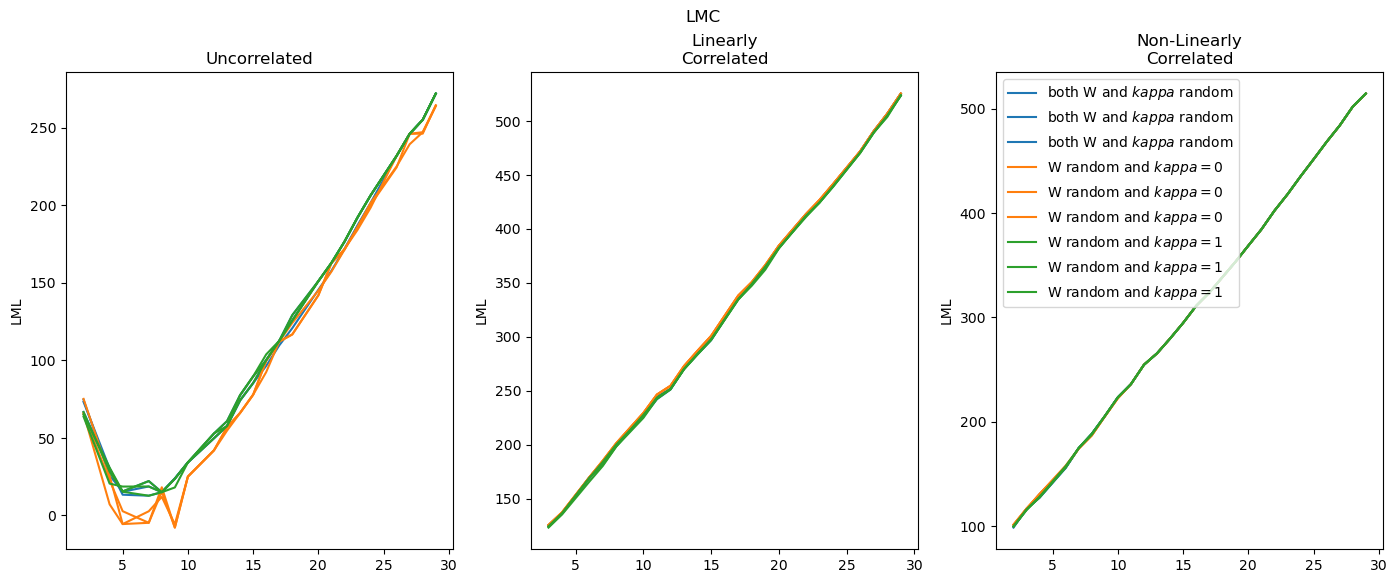

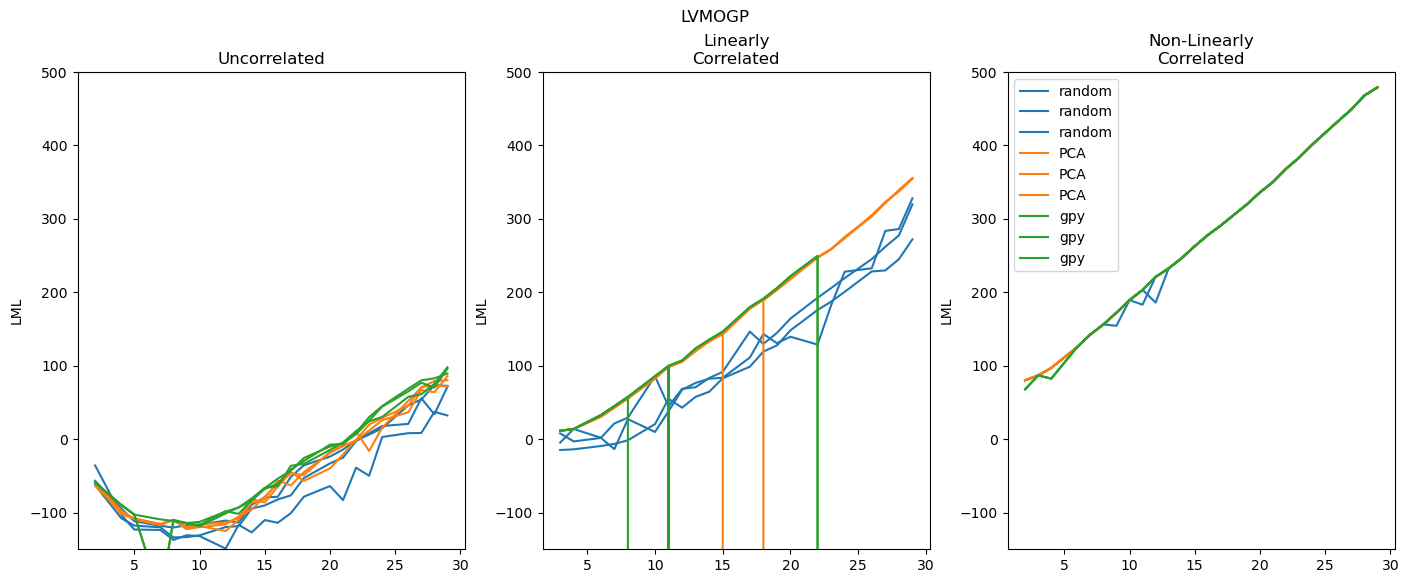

In [44]:
seed = 2
data_seed = 3

plot_log_marginal_likelihoods_of_restarts(hyp_df, seed, data_seed)